In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/winners_f1_1950_2025_v2.csv')

In [5]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1142 entries, 0 to 1141
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1142 non-null   object 
 1   continent    1142 non-null   object 
 2   grand_prix   1142 non-null   object 
 3   circuit      1142 non-null   object 
 4   winner_name  1142 non-null   object 
 5   team         1142 non-null   object 
 6   time         1142 non-null   object 
 7   laps         1142 non-null   float64
 8   year         1142 non-null   int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 80.4+ KB


,0
date,0
continent,0
grand_prix,0
circuit,0
winner_name,0
team,0
time,0
laps,0
year,0


In [6]:
df.iloc[807,6] = '00:55:30'
df['date'] = pd.to_datetime(df['date'], errors='coerce').dt.date
df['time'] = pd.to_datetime(df['time'], errors='coerce').dt.time

/tmp/ipython-input-334320578.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['time'] = pd.to_datetime(df['time'], errors='coerce').dt.time


In [7]:
df.isnull().sum()

,0
date,0
continent,0
grand_prix,0
circuit,0
winner_name,0
team,0
time,0
laps,0
year,0


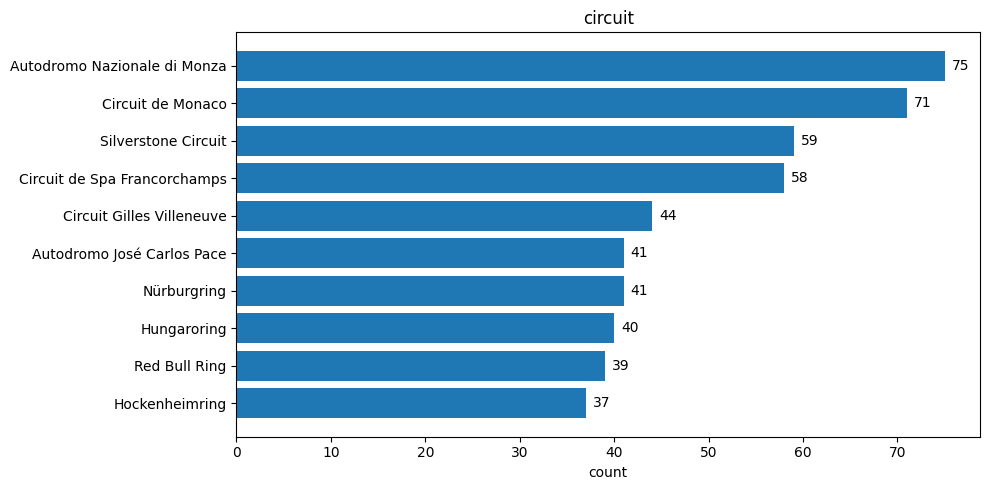

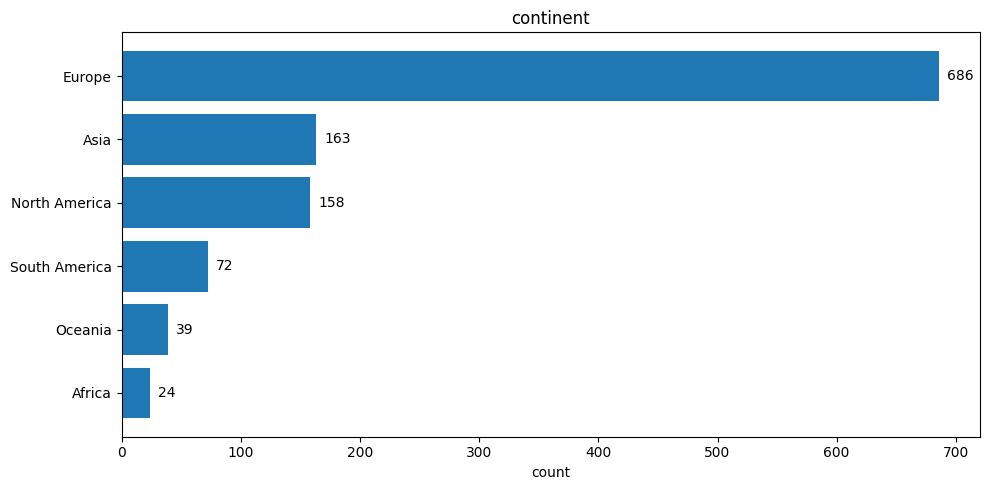

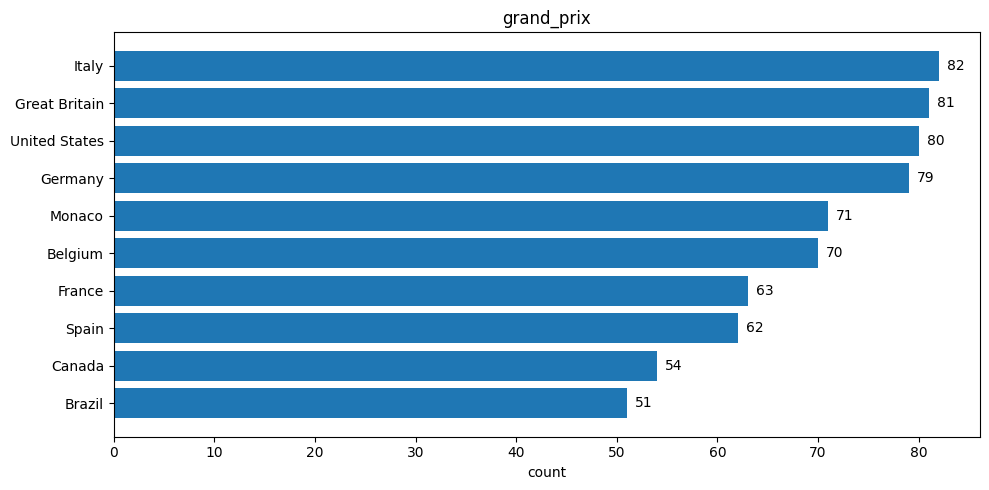

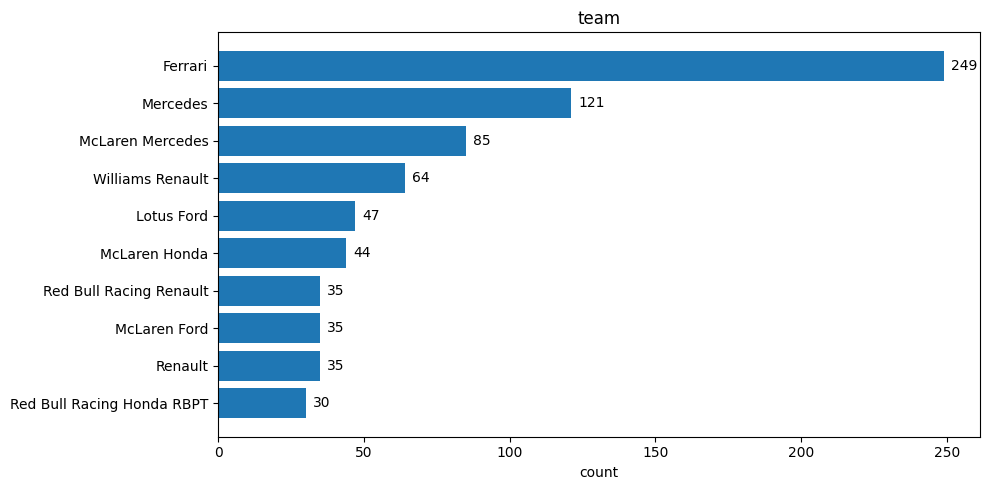

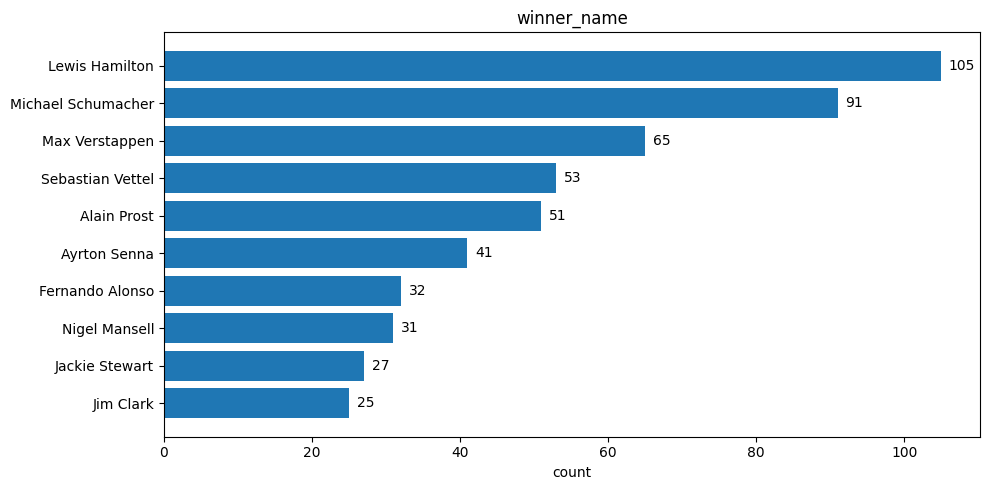

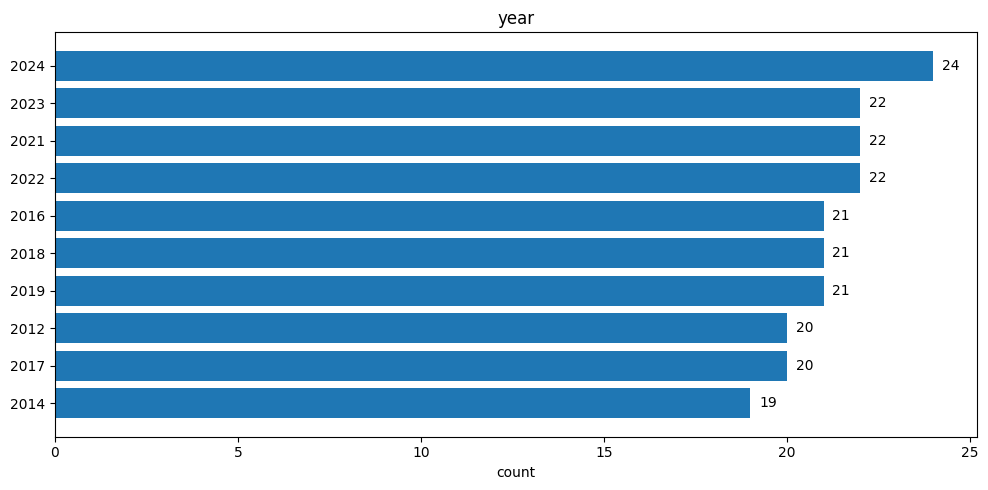

In [8]:
colums = df.columns.difference(['date','time','laps'])
for col in colums:
    counts = df[col].value_counts().head(10)
    plt.figure(figsize=(10,5))
    bars = plt.barh(counts.index.astype(str), counts.values, color='C0')
    plt.title(col)
    plt.xlabel('count')
    plt.gca().invert_yaxis()
    max_val = counts.values.max() if len(counts)>0 else 0
    for bar in bars:
        width = bar.get_width()
        plt.text(width + max_val*0.01, bar.get_y() + bar.get_height()/2,
                 f'{int(width)}', va='center')
    plt.tight_layout()

In [9]:
df['winner_name'].value_counts()

,count
winner_name,
Lewis Hamilton,105
Michael Schumacher,91
Max Verstappen,65
Sebastian Vettel,53
Alain Prost,51
...,...
Jarno Trulli,1
Pastor Maldonado,1
Heikki Kovalainen,1


In [10]:
df['team'].value_counts()

,count
team,
Ferrari,249
Mercedes,121
McLaren Mercedes,85
Williams Renault,64
Lotus Ford,47
...,...
Jordan Ford,1
Sauber BMW,1
Alpine Renault,1


In [11]:
wins = df.groupby(['circuit', 'winner_name']).size().reset_index(name='wins')

top_by_circuit = wins.loc[wins.groupby('circuit')['wins'].idxmax()].sort_values(['wins'], ascending=False).reset_index(drop=True)

top_by_circuit

,circuit,winner_name,wins
0,Silverstone Circuit,Lewis Hamilton,9
1,Hungaroring,Lewis Hamilton,8
2,Circuit de Nevers Magny Cours,Michael Schumacher,8
3,Circuit de Barcelona Catalunya,Michael Schumacher,7
4,Imola,Michael Schumacher,7
...,...,...,...
72,Las Vegas Strip Circuit,George Russell,1
73,Pescara Circuit,Stirling Moss,1
74,Riverside International Raceway,Stirling Moss,1
75,Sebring Raceway,Bruce McLaren,1


In [12]:
wins = df.groupby(['grand_prix', 'winner_name']).size().reset_index(name='wins')

top_by_grand_prix = wins.loc[wins.groupby('grand_prix')['wins'].idxmax()].sort_values(['wins'], ascending=False).reset_index(drop=True)
top_by_grand_prix

,grand_prix,winner_name,wins
0,Great Britain,Lewis Hamilton,9
1,Germany,Michael Schumacher,9
2,Hungary,Lewis Hamilton,8
3,France,Michael Schumacher,8
4,Japan,Michael Schumacher,8
5,Italy,Lewis Hamilton,7
6,Canada,Lewis Hamilton,7
7,San Marino,Michael Schumacher,7
8,Spain,Michael Schumacher,7
9,China,Lewis Hamilton,6
